In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# Initialized random seeds
np.random.seed(1)
tf.set_random_seed(1)

In [33]:
# number of samples
m = 100
# number of features
n_x = 1

# Generate random data 
x_train = np.random.randn(m,n_x)
    
# Add some noise to the random data 
noise = np.random.randn(1,m) * 0.1

w = np.array([0.3]).reshape(1,n_x)
b = -0.2
y_train = np.matmul(w, x_train.T) + b + noise

print('Original weight: {0} and bias: {1}'.format(w, b))
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

Original weight: [[0.3]] and bias: -0.2
x_train shape: (100, 1)
y_train shape: (1, 100)


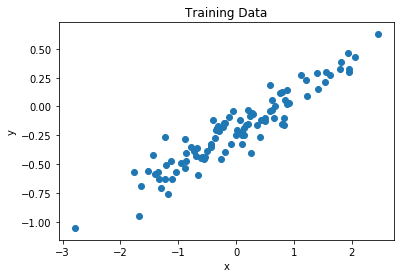

In [34]:
# Plot the training data 
plt.scatter(x_train, y_train) 
plt.xlabel('x') 
plt.ylabel('y') 
plt.title("Training Data") 
plt.show()

A placeholder <b>tf.placeholder</b> in TensorFlow is similar to a variable but unlike the <b>tf.Variable</b>, one doesn't have to provide a initial value when one declares it.

The value can be specified at runtime with <b>feed_dict</b> argument inside the <b>Session.run()</b> call

In [35]:
# Initialize the hyperparameters
learning_rate = 0.1
training_steps = 40

In [36]:
g = tf.Graph()

with g.as_default():

    X = tf.placeholder(tf.float32, shape=[None, n_x], name='X')
    Y = tf.placeholder(tf.float32, shape=None, name='Y')

    with tf.name_scope('inference') as scope:
        W = tf.get_variable('W', [1,n_x], dtype=tf.float32, initializer = tf.random_normal_initializer(seed=1))
        b = tf.get_variable('b', [], dtype=tf.float32, initializer = tf.constant_initializer(0.))
        # Hypothesis 
        y_pred = tf.matmul(W,tf.transpose(X)) + b
    
    with tf.name_scope('loss') as scope:
        # Loss Function - Mean Squared Error (MSE)
        loss = tf.reduce_mean(tf.square(Y-y_pred))

    with tf.name_scope('train') as scope:      
        # Use the Gradient Descent Optimizer 
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train_op = optimizer.minimize(loss)

    # Initialize the Global Variables
    init = tf.global_variables_initializer()

    costs = []
    # Start the Tensorflow Session 
    with tf.Session() as sess: 

        # Initializing the Variables 
        sess.run(init) 

        # Iterating through all the epochs 
        for step in range(training_steps+1): 

            _, c = sess.run([train_op, loss], feed_dict={X: x_train, Y: y_train})
            costs.append(c)
            # Display the cost after every 10 steps 
            if (step % 10 == 0): 
                print("Epoch: {0}, cost: {1}".format(step, c))
            
        weight, bias = sess.run([W,b])
        print('\n')
        print('Estimated weight: {0} and bias: {1}'.format(weight, bias))


Epoch: 0, cost: 1.2825932502746582
Epoch: 10, cost: 0.02551954798400402
Epoch: 20, cost: 0.01145788561552763
Epoch: 30, cost: 0.01130011584609747
Epoch: 40, cost: 0.011298337951302528


Estimated weight: [[0.2943156]] and bias: -0.2019486278295517


The estimated weight and bias values are pretty close to the original value of <b>weight: 0.3</b> and <b>bias: -0.2</b>

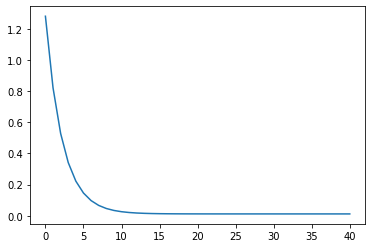

In [37]:
plt.plot(costs)
plt.show()

In [38]:
# Predict using the estimated weight and bias values 
predictions = np.matmul(weight,x_train.T) + bias 
#print(predictions)

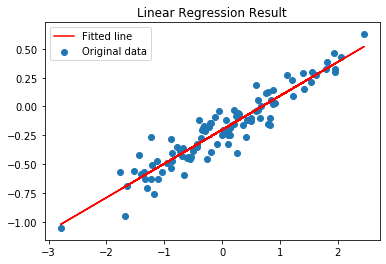

In [39]:
# Plotting the results 
plt.scatter(x_train, y_train, label ='Original data') 
plt.plot(x_train, np.squeeze(predictions), 'r', label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 